In [3]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [77]:
video_path = '../AI Assignment video.mp4'
cap = cv2.VideoCapture(video_path)

In [3]:
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps

In [8]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 30)
r, image = cap.read()
# plt.imshow(image)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

# Threshold the HSV image to get only red colors
mask1 = cv2.inRange(hsv, lower_red, upper_red)

lower_red = np.array([170, 120, 70])
upper_red = np.array([180, 255, 255])

mask2 = cv2.inRange(hsv, lower_red, upper_red)

mask = mask1 + mask2
# plt.imshow(mask)

contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[1:5]
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
#     cv2.rectangle(hsv, (x, y), (x+w, y+h), (0, 255, 0), 2)
    print(f"Rectangle {i+1}: Start Coordinates: ({x}, {y}), Width: {w}, Height: {h}")

Rectangle 1: Start Coordinates: (1251, 11), Width: 493, Height: 498
Rectangle 2: Start Coordinates: (1247, 537), Width: 495, Height: 477
Rectangle 3: Start Coordinates: (791, 15), Width: 464, Height: 492
Rectangle 4: Start Coordinates: (781, 537), Width: 436, Height: 479


In [3]:
quardent = {
    1: [1247, 537, 495, 477],
    2: [781, 537, 437, 479],
    3: [791, 15, 464, 493],
    4: [1251, 11, 494, 498]
}

1745

In [60]:
fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps

fps, total_frames, duration

(30, 3183, 106.1)

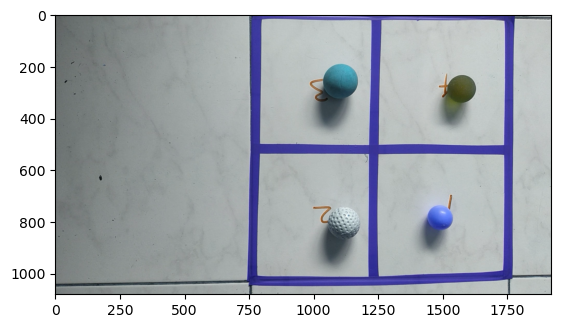

In [61]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 430) #1200
r, f = cap.read()
plt.imshow(f)

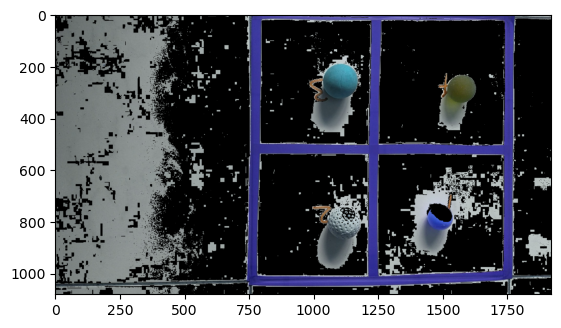

In [81]:
hsv = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, np.array([0, 12, 0]), np.array([220,220,220]))
black_background = np.zeros_like(f)
black_background = cv2.bitwise_or(black_background, cv2.bitwise_and(f, f, mask=mask))
plt.imshow(black_background)

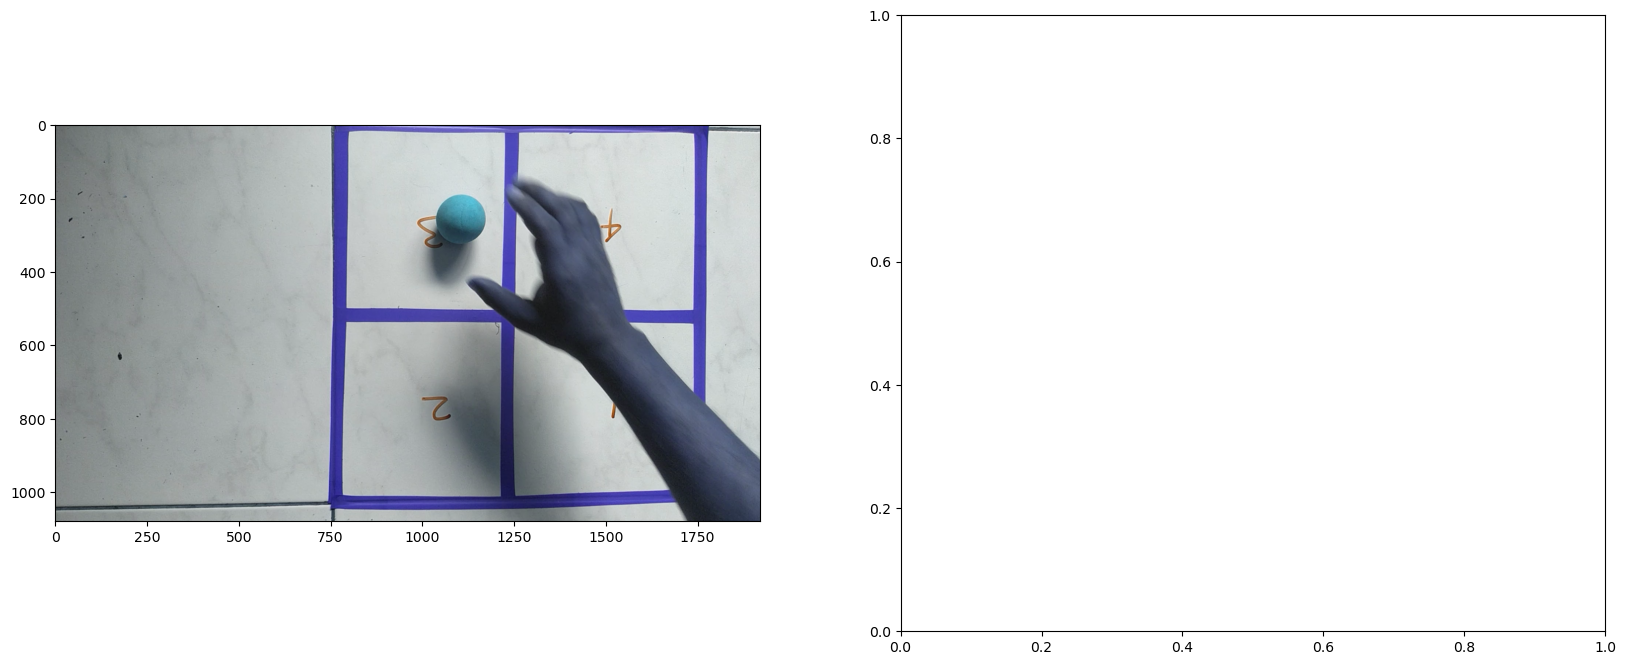

In [75]:
video_path = 'AI Assignment video.mp4'
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 90) #1200
r, f = cap.read()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.imshow(f)

hsv = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
lower_red = np.array([10, 10, 230])
upper_red = np.array([40, 50, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)


kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
            # Calculate area and filter small contours
            area = cv2.contourArea(contour)
            if area > 500:  # adjust this threshold based on your requirements
                print( area)
                
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    ball_coordinates = (cx, cy)
                    print(ball_coordinates)
                    ax2.imshow(cv2.circle(f, (cx, cy), 70, (0, 0, 255), 5))
plt.show()                    

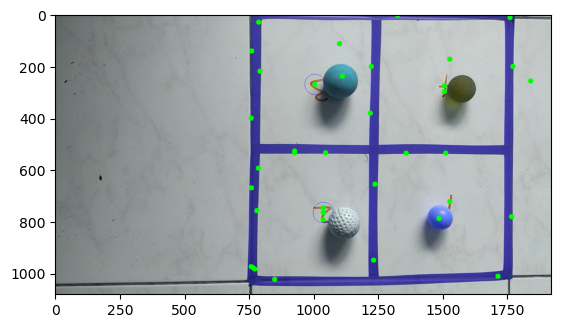

In [123]:
plt.imshow(im)

In [424]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 430) #1200
r, f = cap.read()

In [76]:
def detect_balls(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define color ranges in HSV
#     color_ranges = {
#         'white':    ([10, 8, 220], [30, 20, 255]),
#         'orange':  ([5, 100, 100], [15, 255, 255]),
#         'green':   ([85, 0, 60], [100, 255, 120]),
#         'yellow': ([20, 100, 100], [40, 255, 255])
#     }
    
    color_ranges = {
        'white': ([10, 10, 230], [40, 50, 255]),
        'orange': ([5, 130, 100], [6, 255, 255]),
        'green': ([85, 0, 60], [100, 255, 120]),
        'yellow': ([20, 100, 100], [40, 255, 255])
    }


    detected_balls = []
    
    # Process each color 
    for color_name, (lower_color, upper_color) in color_ranges.items():

        mask = cv2.inRange(hsv, np.array(lower_color), np.array(upper_color))
        
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Process each contour
        for contour in contours:

            area = cv2.contourArea(contour)
            if area > 500:
                x, y, w, h = cv2.boundingRect(contour)
                
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    detected_balls.append((color_name, (cx, cy)))
                        
                    # Draw a circle around the ball
                    cv2.circle(image, (cx, cy), 70, (0, 0, 255), 5)  # Green circle
    
    return image, detected_balls

[('white', (1102, 168)), ('yellow', (1110, 241))]

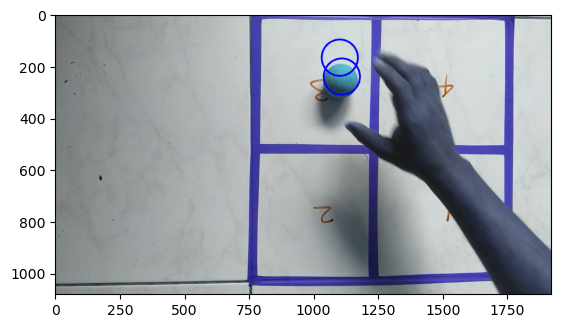

In [438]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 90) #1200
r, f = cap.read()
image, de_b = detect_balls(f)
plt.imshow(image)
de_b

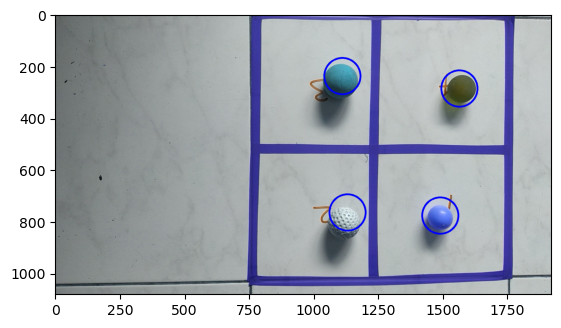

In [427]:
plt.imshow(image)

In [429]:
de_b

[('white', (1132, 765)),
 ('orange', (1491, 777)),
 ('green', (1565, 287)),
 ('yellow', (1112, 239))]

In [402]:
de_b

[('white', (1618, 262)), ('yellow', (1112, 239))]

In [105]:
import cv2
import numpy as np

# Load the image
# image_path = '/mnt/data/colour.png'
# image = cv2.imread(image_path)

cap.set(cv2.CAP_PROP_POS_FRAMES, 430)
r, f = cap.read()
# plt.imshow(f)
hsv_image = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)

# Function to find the HSV range for a given region
def get_hsv_range(hsv_image, lower_bound, upper_bound):
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    hsv_vals = hsv_image[mask > 0]
    min_hsv = hsv_vals.min(axis=0)
    max_hsv = hsv_vals.max(axis=0)
    return min_hsv, max_hsv

# Approximate color regions in the image (adjusted to four values each)
color_regions = {
    'yellow': (180, 40, 280, 140),
    'white': (80, 300, 180, 400),
    'orange': (380, 480, 480, 580),
    'bottle_green': (280, 140, 380, 240)
}

# Adjusted HSV ranges
color_ranges = {}

for color, (x1, y1, x2, y2) in color_regions.items():
    lower_bound = np.array([0, 0, 0])
    upper_bound = np.array([179, 255, 255])
    min_hsv, max_hsv = get_hsv_range(hsv_image[y1:y2, x1:x2], lower_bound, upper_bound)
    color_ranges[color] = (min_hsv, max_hsv)

print(color_ranges)


{'yellow': (array([ 18,   7, 100], dtype=uint8), array([ 45,  20, 146], dtype=uint8)), 'white': (array([26,  8, 69], dtype=uint8), array([ 49,  26, 140], dtype=uint8)), 'orange': (array([26, 11, 65], dtype=uint8), array([ 43,  27, 167], dtype=uint8)), 'bottle_green': (array([26,  7, 98], dtype=uint8), array([ 43,  18, 159], dtype=uint8))}


In [ ]:
current_frame = 0
while current_frame < total_frames:
    cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
    r, frame = cap.read()
    
    # To detect ball
    image, ball_color_cord = detect_balls(f)

    cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame+30)
    r, f = cap.read()
    plt.imshow(f)

    current_frame = current_frame+30

In [419]:
quardent = {
    1: [1247, 537, 495, 477],
    2: [781, 537, 437, 479],
    3: [791, 15, 464, 493],
    4: [1251, 11, 494, 498]
}

for i in quardent:
    X, Y, W, H = quardent.get(i)
    print(X, Y, W, H)

1247 537 495 477
781 537 437 479
791 15 464 493
1251 11 494 498


In [130]:
quardent_map = {
    'white': None,
    'orange': None,
    'green': None,
    'yellow': None
}

quardent = {
    1: [1247, 537, 495, 477],
    2: [781, 537, 437, 479],
    3: [791, 15, 464, 493],
    4: [1251, 11, 494, 498]
}

current_frame = 430
# while current_frame < total_frames:
cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
r, frame = cap.read()

# To detect ball
image, ball_color_cord = detect_balls(frame)
print(ball_color_cord)

for key, value in ball_color_cord:
    x = value[0]
    y = value[1]

    for i in quardent:
        X, Y, W, H = quardent.get(i)

        if (x>X and X+W>x and y>Y and Y+H>y):
            quardent_map[key] = i
            print(key, i)

colors_to_check = ['white', 'orange', 'green', 'yellow']

for color in colors_to_check:
    found = False
    for item in ball_color_cord:
        if item[0] == color:
            found = True
            break
    if not found:
        print(f"{color} is missing in d")
# cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame+30)
# r, f = cap.read()
# plt.imshow(f)

# current_frame = current_frame+30

[('white', (1132, 765)), ('orange', (1491, 777)), ('green', (1565, 287)), ('yellow', (1112, 239))]
white 2
orange 1
green 4
yellow 3


In [78]:
ball_state = {
    "quardent": {
        'white': None,
        'orange': None,
        'green': None,
        'yellow': None
    },
    "time_stamp":{
        'white': None,
        'orange': None,
        'green': None,
        'yellow': None
    },
    "entry":{
        'white': False,
        'orange': False,
        'green': False,
        'yellow': False
    }
}

color_ranges = {
    'white': ([25, 8, 215], [30, 20, 240]),
    'orange': ([5, 130, 100], [6, 255, 255]),
    'green': ([85, 0, 60], [100, 255, 120]),
    'yellow': ([20, 100, 100], [40, 255, 255])
}

quardent = {
    1: [1247, 537, 495, 477],
    2: [781, 537, 437, 479],
    3: [791, 15, 464, 493],
    4: [1251, 11, 494, 498]
}

current_frame = 30

fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

while current_frame < total_frames:
    cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
    r, frame = cap.read()

    # To detect ball
    image, ball_color_cord = detect_balls(frame)
#     print(ball_color_cord)

    for color, value in ball_color_cord:
        x = value[0]
        y = value[1]

        for i in quardent:
            X, Y, W, H = quardent.get(i)

            if (x>X and X+W>x and y>Y and Y+H>y):
                if ball_state['quardent'][color] is None:
                    
                    
                    cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame+30)
                    r, frame = cap.read()
                    image, ball_color_cord = detect_balls(frame)

                    for item in ball_color_cord:
                        if item[0] == color:
                            x = item[1][0]
                            y = item[1][1]
                            for j in quardent:
                                X, Y, W, H = quardent.get(j)
                                if (x>X and X+W>x and y>Y and Y+H>y):
                                    if i == j:                 
                                        ball_state['quardent'][color] = i
                                        ball_state['time_stamp'][color] = current_frame/fps
                elif ball_state['quardent'][color] == i:
                    if ball_state['entry'][color] is False:
                        # add to output
                        print("entry", end="      ")
                        print(color, i, ball_state['time_stamp'][color])
                        
                        ball_state['entry'][color] = True
                    else:
                        pass
                else:
                    ball_state['quardent'][color] = None
                    ball_state['time_stamp'][color] = None
                    ball_state['entry'][color] = False
                    # add to output
                    print("exit", end="      ")
                    print(color, i, current_frame/fps)
     
    # if remove without detected
    colors_to_check = ['white', 'orange', 'green', 'yellow']

    for color in colors_to_check:
        found = False
        for item in ball_color_cord:
            if item[0] == color:
                found = True
                break
        if not found:
            if (ball_state['quardent'][color] is not None and ball_state['entry'][color] == True):
                # add to output
                print("fast_exit", end="      ")
                print(color, ball_state['quardent'][color], current_frame/fps)
                
                ball_state['quardent'][color] = None
                ball_state['time_stamp'][color] = None
                ball_state['entry'][color] = False
                
    current_frame += 30

entry      yellow 3 2.0
entry      white 2 10.0
entry      green 4 10.0
entry      orange 1 13.0
fast_exit      white 2 16.0
fast_exit      green 4 19.0
fast_exit      orange 1 21.0
entry      white 4 25.0
entry      orange 2 27.0
fast_exit      yellow 3 30.0
entry      green 3 33.0
entry      yellow 1 37.0
fast_exit      orange 2 42.0
fast_exit      yellow 1 44.0
fast_exit      green 3 47.0
entry      yellow 3 49.0
entry      orange 1 52.0
fast_exit      white 4 55.0
entry      green 4 57.0
fast_exit      orange 1 64.0
fast_exit      green 4 65.0
fast_exit      yellow 3 67.0
entry      yellow 1 70.0
entry      white 3 74.0
entry      green 2 77.0
entry      orange 4 78.0
fast_exit      yellow 1 85.0
fast_exit      green 2 86.0
fast_exit      orange 4 87.0
fast_exit      white 3 88.0
entry      orange 1 90.0
fast_exit      orange 1 94.0
entry      orange 1 95.0
entry      white 2 98.0
fast_exit      white 2 99.0
fast_exit      orange 1 99.0
entry      green 4 99.0
entry      yellow 3 1

In [453]:
ball_state['entry']['white'] is False

True

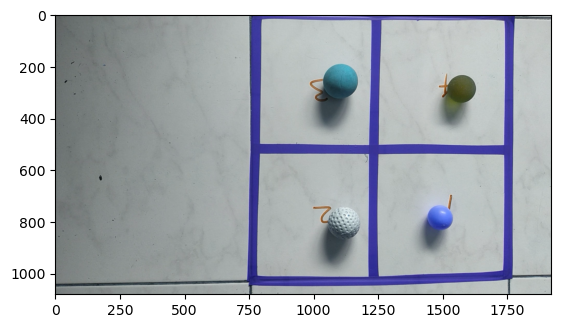

In [422]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 430)
r, frame = cap.read()
plt.imshow(frame)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open video capture
video_path = 'AI Assignment video.mp4'
cap = cv2.VideoCapture(video_path)


# Define color ranges
color_ranges = {
    'white': ([10, 10, 230], [40, 50, 255]),
#     'orange': ([5, 130, 100], [6, 255, 255]),
#     'green': ([85, 0, 60], [100, 255, 120]),
#     'yellow': ([20, 100, 100], [40, 255, 255])
}

# Iterate through frames
current_frame = 0
end_frame = 3100

while current_frame < end_frame:
    cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
    ret, frame = cap.read()
    if not ret:
        break
    
#     fig, axes = plt.subplots(1, len(color_ranges) + 1, figsize=(20, 8))
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    axes[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f'Frame: {current_frame}')

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    for idx, (color_name, (lower, upper)) in enumerate(color_ranges.items(), start=1):
        lower = np.array(lower)
        upper = np.array(upper)
        
        mask = cv2.inRange(hsv, lower, upper)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 500:  # Threshold for contour area
                print(f'Frame: {current_frame}, Color: {color_name}, Area: {area}')
                
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    ball_coordinates = (cx, cy)
                    print(f'Ball coordinates: {ball_coordinates}')
                    
#                     cv2.circle(frame, (cx, cy), 70, (0, 0, 255), 5)
                    axes[1].imshow(cv2.circle(frame, (cx, cy), 70, (0, 0, 255), 5))
        
#         axes[idx].imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
#         axes[idx].set_title(f'{color_name} Mask')
    
    plt.show()
    
    current_frame += 30

cap.release()
cv2.destroyAllWindows()
